In [1]:
from pipelines import preprocess_pipeline, split_pipeline, train_pipeline
from utils import open_json
from print_info import column_info, rare_category_info, unique_categorical_values_info

In [2]:
categorical = ["meta.district", "type", "balcon", "wall_id", "keep", "nearest_metro"]
columns_to_keep = [
    "id",
    "meta.district",
    "floors",
    "bedrooms_cnt",
    "euro",
    "wall_id",
    "rooms",
    "type",
    "floor",
    "balcon",
    "studio",
    "square",
    "building_year",
    "lo",
    "la",
    "price",
    "keep",
]
city = "Нижний Новгород"
file_name = "nn"

In [3]:
df = open_json(f"{file_name}.json")
df = df.loc[:, columns_to_keep]
df

,id,meta.district,floors,bedrooms_cnt,euro,wall_id,rooms,type,floor,balcon,studio,square,building_year,lo,la,price,keep
0,10678860,Ленинский,23,1,False,14,1,flat,8,yes_balcon,False,32.6,2017,43.950866,56.301359,7050000,cosmetic
1,10718538,Московский,5,1,False,11,1,flat,3,yes_balcon,False,30.3,1963,43.893975,56.315001,3900000,cosmetic
2,10647777,Советский,5,1,False,11,1,room,2,yes_balcon,False,17,1963,43.986313,56.293437,2200000,cosmetic
3,10522656,Советский,9,1,False,11,1,flat,8,yes_balcon,False,31,1979,43.989179,56.292073,5150000,good
4,10517968,Нижегородский,15,1,False,14,1,apart,3,no_balcon,False,35,2021,44.002752,56.313159,10200000,design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,8180405,Приокский,9,5,False,11,5,flat,2,loggia,False,121.7,1982,43.977339,56.264647,15000000,cosmetic
943,8116407,Кстово г,5,2,False,12,2,flat,3,yes_balcon,False,46.6,1989,44.211108,56.155508,5300000,good
944,8074715,Автозаводский,3,3,False,11,3,flat,3,yes_balcon,False,80,1989,43.891918,56.270526,4850000,cosmetic
945,7256480,Нижегородский,17,1,False,11,1,flat,9,yes_balcon,True,26.7,2023,44.088416,56.299441,5000000,well_black


In [4]:
df = preprocess_pipeline(df, city, categorical, need_quantiles_trim = True, need_isolation_trim = True)
df

,meta.district,floors,bedrooms_cnt,euro,wall_id,rooms,type,floor,balcon,studio,square,building_year,price,keep,nearest_metro,dist_to_metro,distance_to_centre
0,Ленинский,23,1,False,14,1,flat,8,yes_balcon,False,32.6,7,7050000.0,cosmetic,Ленинская,0.924353,4.380338
1,Московский,5,1,False,11,1,flat,3,yes_balcon,False,30.3,61,3900000.0,cosmetic,Бурнаковская,1.624095,6.832841
3,Советский,9,1,False,11,1,flat,8,yes_balcon,False,31.0,45,5150000.0,good,Горьковская,2.455506,4.148798
4,Нижегородский,15,1,False,14,1,apart,3,no_balcon,False,35.0,3,10200000.0,design,Горьковская,0.496711,1.728702
5,Канавинский,5,2,False,12,2,flat,5,yes_balcon,False,48.4,36,4950000.0,good,Буревестник,4.429202,10.026756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,Московский,5,2,False,12,4,flat,5,yes_balcon,False,58.7,53,6100000.0,good,Буревестник,1.468546,7.674588
938,Ленинский,9,2,False,12,2,flat,7,loggia,False,51.4,43,5550000.0,well_black,Заречная,1.117312,5.714030
943,Кстово г,5,2,False,12,2,flat,3,yes_balcon,False,46.6,35,5300000.0,good,Горьковская,22.113289,23.190844
944,Автозаводский,3,3,False,11,3,flat,3,yes_balcon,False,80.0,35,4850000.0,cosmetic,Пролетарская,1.429630,9.379248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 945
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meta.district       733 non-null    category
 1   floors              733 non-null    int64   
 2   bedrooms_cnt        733 non-null    int64   
 3   euro                733 non-null    bool    
 4   wall_id             733 non-null    category
 5   rooms               733 non-null    int64   
 6   type                733 non-null    category
 7   floor               733 non-null    int64   
 8   balcon              733 non-null    category
 9   studio              733 non-null    bool    
 10  square              733 non-null    float64 
 11  building_year       733 non-null    int64   
 12  price               733 non-null    float64 
 13  keep                733 non-null    category
 14  nearest_metro       733 non-null    category
 15  dist_to_metro       733 non-null    float64 


In [6]:

df["price"].describe().apply(lambda x: format(x, 'f'))

count         733.000000
mean      6706577.080491
std       2605092.446388
min       3248000.000000
25%       4750000.000000
50%       5980000.000000
75%       8000000.000000
max      15600000.000000
Name: price, dtype: object

In [7]:
rare_category_info(df, "nearest_metro", 10000)

Горьковская: 294
Буревестник: 120
Парк Культуры: 64
Двигатель Революции: 53
Автозаводская: 41
Заречная: 29
Стрелка: 29
Бурнаковская: 25
Пролетарская: 23
Ленинская: 18
Комсомольская: 14
Кировская: 12
Чкаловская: 8
Московская: 2
Канавинская: 1


In [8]:
column_info(df)

Информация о колонках:
Колонка 'meta.district': количество уникальных значений = 14, тип данных = category, количество NaN = 0
Колонка 'floors': количество уникальных значений = 25, тип данных = int64, количество NaN = 0
Колонка 'bedrooms_cnt': количество уникальных значений = 4, тип данных = int64, количество NaN = 0
Колонка 'euro': количество уникальных значений = 2, тип данных = bool, количество NaN = 0
Колонка 'wall_id': количество уникальных значений = 10, тип данных = category, количество NaN = 0
Колонка 'rooms': количество уникальных значений = 4, тип данных = int64, количество NaN = 0
Колонка 'type': количество уникальных значений = 3, тип данных = category, количество NaN = 0
Колонка 'floor': количество уникальных значений = 18, тип данных = int64, количество NaN = 0
Колонка 'balcon': количество уникальных значений = 8, тип данных = category, количество NaN = 0
Колонка 'studio': количество уникальных значений = 2, тип данных = bool, количество NaN = 0
Колонка 'square': количес

In [9]:
# x_train, x_test, y_train, y_test = split_pipeline(df, 0.8, 0.2, "price", random_state=42)

In [10]:
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [11]:
# from sklearn.model_selection import train_test_split
# x_test, x_val, y_test, y_val = train_test_split(
#     x_test, y_test, test_size=0.5, random_state=42
# )

In [12]:
# from sklearn.model_selection import RepeatedStratifiedKFold


# X, x_test, y, y_test = split_pipeline(df, 0.9, 0.1, "price", random_state=42)


# # Теперь используем Stratified K-Fold для разделения временного набора на тренировочный и валидационный наборы
# skf = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=42)

# # Создаем пустые списки для тренировочных и валидационных индексов
# weights = []

# # Заполняем списки индексами для каждого фолда Stratified K-Fold
# for train_index, val_index in skf.split(X, y):
#     x_train = X.iloc[train_index]
#     y_train = y.iloc[train_index]
#     x_val = X.iloc[val_index]
#     y_val = y.iloc[val_index]
#     model = train_pipeline(x_train, y_train, x_val, y_val, categorical, model_type="catboost", loss="RMSE")
#     weights.append(model)

In [13]:
# import numpy as np
# predictions = []

# for model in weights:
#     predictions.append(model.predict(x_test))

# y_pred = np.mean(predictions, axis=0)

In [14]:
model = train_pipeline(df.drop("price", axis=1), df["price"], categories=categorical, model_type="catboost")

Learning rate set to 0.005996
0:	learn: 2593972.4086529	total: 57.2ms	remaining: 9m 31s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


100:	learn: 1930283.8798523	total: 259ms	remaining: 25.4s
200:	learn: 1537047.9505716	total: 407ms	remaining: 20.2s
300:	learn: 1289722.6845891	total: 549ms	remaining: 18s
400:	learn: 1137677.4937240	total: 690ms	remaining: 16.8s
500:	learn: 1037833.9772965	total: 836ms	remaining: 16.1s
600:	learn: 969054.0199489	total: 979ms	remaining: 15.5s


700:	learn: 920088.6949096	total: 1.14s	remaining: 15.3s
800:	learn: 882775.0555083	total: 1.31s	remaining: 15.2s
900:	learn: 852712.7096400	total: 1.47s	remaining: 15s
1000:	learn: 824381.6663384	total: 1.64s	remaining: 14.9s
1100:	learn: 799880.2767531	total: 1.8s	remaining: 14.7s
1200:	learn: 777898.4685867	total: 1.96s	remaining: 14.4s
1300:	learn: 758409.8336175	total: 2.12s	remaining: 14.3s
1400:	learn: 742636.0931803	total: 2.27s	remaining: 14s
1500:	learn: 725552.5339781	total: 2.43s	remaining: 13.9s
1600:	learn: 710732.2767926	total: 2.6s	remaining: 13.7s
1700:	learn: 695921.0947251	total: 2.74s	remaining: 13.4s
1800:	learn: 682031.1726688	total: 2.88s	remaining: 13.2s
1900:	learn: 667999.2869566	total: 3.03s	remaining: 13s
2000:	learn: 654276.8636711	total: 3.17s	remaining: 12.7s
2100:	learn: 638535.0907746	total: 3.32s	remaining: 12.5s
2200:	learn: 625341.4592711	total: 3.46s	remaining: 12.3s
2300:	learn: 612110.7694501	total: 3.61s	remaining: 12.1s
2400:	learn: 600187.45020

In [15]:
# from sklearn.metrics import root_mean_squared_error
# y_pred = model.predict(x_test)
# rmse = root_mean_squared_error(y_test, y_pred)
# rmse



In [16]:
model.save_model(f'{file_name}.cbm')

In [17]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

NameError: name 'x_test' is not defined

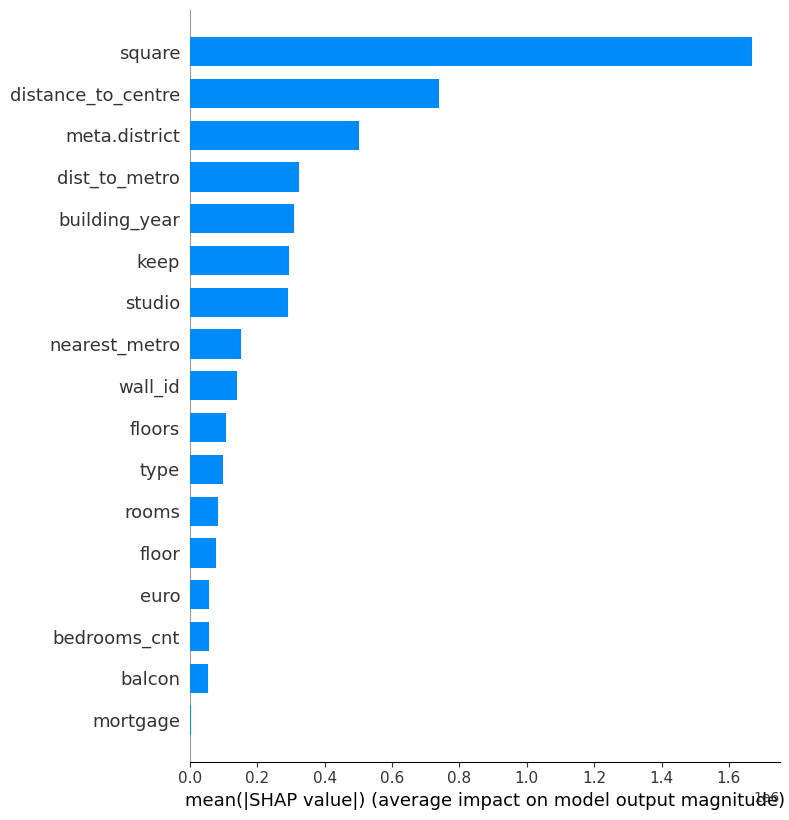

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

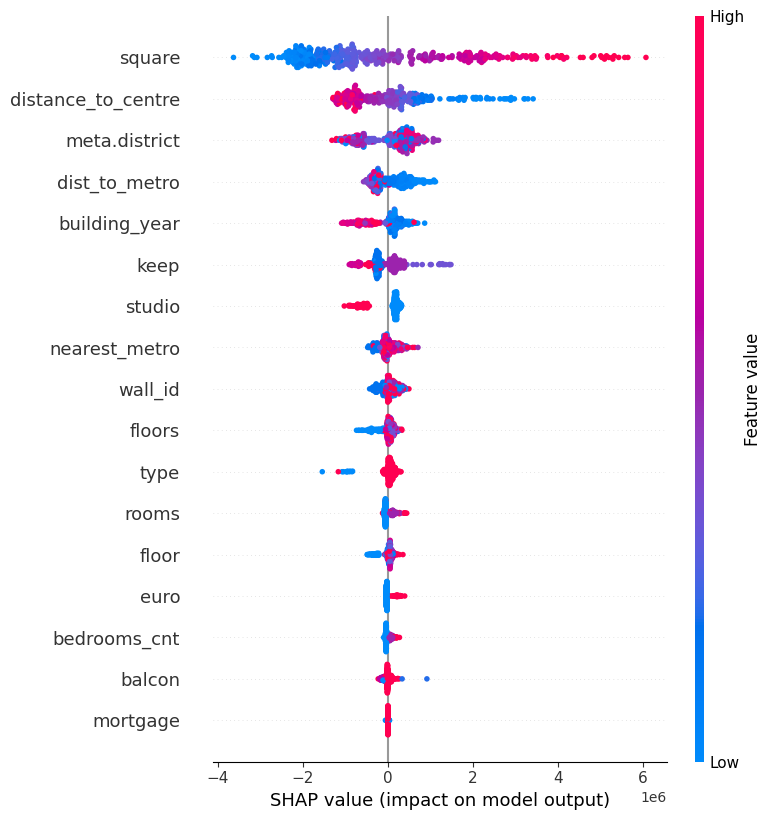

In [ ]:
shap.summary_plot(shap_values, x_test)